# Telecom Churn Prediction Case Study

## Problem Statement
- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

- For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

- In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage

## Business Goal
- The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

- Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

- Recommend strategies to manage customer churn based on your observations.

## Steps to be Followed
1. Reading and Understanding Data
2. Data Pre-processing
   - Data Cleaning
   - Missing Value Treatment
   - Feature Engineering
   - Outlier Analysis and Treatment
3. Data Visualization(EDA)
4. Data Preparation
   - Train-Test split
   - Scaling
   - PCA
5. Model Building and Evaluation
6. Choose Best Model
7. Choosing Important Features
8. Business Recommendations

### Reading and Understanding Data

In [1854]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [1855]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics

In [1856]:
# Reading the CSV
telecom=pd.read_csv('train.csv')

In [1857]:
telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [1858]:
# Checking the dimension of DataFrame
telecom.shape

(69999, 172)

In [1859]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [1860]:
# Let's see the type of each column
telecom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [1861]:
# Lets check number of null values
null_cols = telecom.isnull().sum()
print(null_cols[null_cols>0])

loc_og_t2o_mou            702
std_og_t2o_mou            702
loc_ic_t2o_mou            702
last_date_of_month_7      399
last_date_of_month_8      733
                        ...  
night_pck_user_7        52134
night_pck_user_8        51582
fb_user_6               52431
fb_user_7               52134
fb_user_8               51582
Length: 125, dtype: int64


In [1862]:
# Let check percentage of missing values
null_cols = telecom.isna().sum()
cols_with_missing = null_cols[null_cols > 0].index.tolist()
missing_values_percent = (telecom[cols_with_missing].isna().mean() * 100).round(2)
print(missing_values_percent)

loc_og_t2o_mou           1.00
std_og_t2o_mou           1.00
loc_ic_t2o_mou           1.00
last_date_of_month_7     0.57
last_date_of_month_8     1.05
                        ...  
night_pck_user_7        74.48
night_pck_user_8        73.69
fb_user_6               74.90
fb_user_7               74.48
fb_user_8               73.69
Length: 125, dtype: float64


### Data Pre-processing

#### Data Cleaning

In [1863]:
# Let's check columns with missing values more than 50%
cols_to_drop = missing_values_percent[missing_values_percent > 50]
cols_to_drop

date_of_last_rech_data_6    74.90
date_of_last_rech_data_7    74.48
date_of_last_rech_data_8    73.69
total_rech_data_6           74.90
total_rech_data_7           74.48
total_rech_data_8           73.69
max_rech_data_6             74.90
max_rech_data_7             74.48
max_rech_data_8             73.69
count_rech_2g_6             74.90
count_rech_2g_7             74.48
count_rech_2g_8             73.69
count_rech_3g_6             74.90
count_rech_3g_7             74.48
count_rech_3g_8             73.69
av_rech_amt_data_6          74.90
av_rech_amt_data_7          74.48
av_rech_amt_data_8          73.69
arpu_3g_6                   74.90
arpu_3g_7                   74.48
arpu_3g_8                   73.69
arpu_2g_6                   74.90
arpu_2g_7                   74.48
arpu_2g_8                   73.69
night_pck_user_6            74.90
night_pck_user_7            74.48
night_pck_user_8            73.69
fb_user_6                   74.90
fb_user_7                   74.48
fb_user_8     

In [1864]:
# Let's remove these columns since imputing them will result in bias
# select columns with missing values greater than 50%
cols_to_drop = missing_values_percent[missing_values_percent > 50].index

# drop the columns
telecom = telecom.drop(cols_to_drop, axis=1)

In [1865]:
# Let's check shape now
telecom.shape

(69999, 142)

In [1866]:
# Let's check columns with missing values less than 10%
cols_to_drop = missing_values_percent[missing_values_percent < 10]
cols_to_drop

loc_og_t2o_mou          1.00
std_og_t2o_mou          1.00
loc_ic_t2o_mou          1.00
last_date_of_month_7    0.57
last_date_of_month_8    1.05
                        ... 
ic_others_7             3.84
ic_others_8             5.29
date_of_last_rech_6     1.57
date_of_last_rech_7     1.76
date_of_last_rech_8     3.52
Length: 95, dtype: float64

#### Missing Value Treatment

In [1867]:
# Impute columns with 0 if the percentage of missing values is less than 10%

cols_to_impute = missing_values_percent[missing_values_percent < 10].index
telecom[cols_to_impute] = telecom[cols_to_impute].fillna(0)

In [1868]:
# Let check percentage of missing values again
null_cols = telecom.isna().sum()
cols_with_missing = null_cols[null_cols > 0].index.tolist()
missing_values_percent = (telecom[cols_with_missing].isna().mean() * 100).round(2)
print(missing_values_percent)

Series([], dtype: float64)


In [1869]:
telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [1870]:
#dropping column id and circle id since irrelevant
#dropping columns which have 0 variance
telecom=telecom.drop(['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

In [1871]:
telecom.shape

(69999, 131)

In [1872]:
# Let check missing values now
null_cols = telecom.isnull().sum()
print(null_cols[null_cols>0])

Series([], dtype: int64)


In [1873]:
#removing date related columns
telecom_object=telecom.select_dtypes(include=['object'])
date_col=list(telecom_object.columns)

In [1874]:
telecom=telecom.drop(columns=date_col,axis=1)

In [1849]:
telecom.shape

(69999, 125)

In [1848]:
telecom_EDA=telecom

#### Feature Engineering for EDA

Creating new columns from existing columns such that 'col_change_in_behaviour=(col_6+col_7)/2 - col_8'

In [1850]:
result=[]
columns_with_suffix_678 = [col for col in telecom.columns if col.endswith(('_6', '_7', '_8'))]
for column in columns_with_suffix_678:
    if column.split('_')[-1]=='6':
        new_col_name = column.replace('6', 'change_in_behaviour')
        
        telecom_EDA[new_col_name] = (telecom_EDA[column.replace('6', '6')] + telecom_EDA[column.replace('6', '7')]) / 2 - telecom_EDA[column.replace('6', '8')]
        result.append(new_col_name)
        print(result[-1])

arpu_change_in_behaviour
onnet_mou_change_in_behaviour
offnet_mou_change_in_behaviour
roam_ic_mou_change_in_behaviour
roam_og_mou_change_in_behaviour
loc_og_t2t_mou_change_in_behaviour
loc_og_t2m_mou_change_in_behaviour
loc_og_t2f_mou_change_in_behaviour
loc_og_t2c_mou_change_in_behaviour
loc_og_mou_change_in_behaviour
std_og_t2t_mou_change_in_behaviour
std_og_t2m_mou_change_in_behaviour
std_og_t2f_mou_change_in_behaviour
std_og_mou_change_in_behaviour
isd_og_mou_change_in_behaviour
spl_og_mou_change_in_behaviour
og_others_change_in_behaviour
total_og_mou_change_in_behaviour
loc_ic_t2t_mou_change_in_behaviour
loc_ic_t2m_mou_change_in_behaviour
loc_ic_t2f_mou_change_in_behaviour
loc_ic_mou_change_in_behaviour
std_ic_t2t_mou_change_in_behaviour
std_ic_t2m_mou_change_in_behaviour
std_ic_t2f_mou_change_in_behaviour
std_ic_mou_change_in_behaviour
total_ic_mou_change_in_behaviour
spl_ic_mou_change_in_behaviour
isd_ic_mou_change_in_behaviour
ic_others_change_in_behaviour
total_rech_num_change

In [1851]:
#doing same as above for col without suffix
telecom_EDA['VBC_change_in_behaviour'] = (telecom_EDA['jun_vbc_3g'] + telecom_EDA['jul_vbc_3g']) / 2 - telecom_EDA['aug_vbc_3g']
col_drop=['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']
telecom_EDA=telecom_EDA.drop(columns=col_drop,axis=1)

In [1852]:
#dropping columns with suffix _6,_7 and _8
telecom_EDA=telecom_EDA.drop(columns=columns_with_suffix_678,axis=1)

In [1875]:
telecom.shape

(69999, 125)

In [1876]:
telecom_EDA.head()

,aon,churn_probability,arpu_change_in_behaviour,onnet_mou_change_in_behaviour,offnet_mou_change_in_behaviour,roam_ic_mou_change_in_behaviour,roam_og_mou_change_in_behaviour,loc_og_t2t_mou_change_in_behaviour,loc_og_t2m_mou_change_in_behaviour,loc_og_t2f_mou_change_in_behaviour,...,total_rech_amt_change_in_behaviour,max_rech_amt_change_in_behaviour,last_day_rch_amt_change_in_behaviour,vol_2g_mb_change_in_behaviour,vol_3g_mb_change_in_behaviour,monthly_2g_change_in_behaviour,sachet_2g_change_in_behaviour,monthly_3g_change_in_behaviour,sachet_3g_change_in_behaviour,VBC_change_in_behaviour
0,1958,0,51.6160,85.190,62.130,0.00,0.000,0.835,8.335,0.0,...,61.0,55.0,65.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0
1,710,0,18.4405,0.000,-17.895,0.00,0.000,0.000,0.000,0.0,...,22.5,22.5,0.0,176.455,1.98,0.0,0.0,0.5,0.0,0.0
2,882,0,81.9910,8.230,68.020,0.00,0.000,6.755,12.055,0.0,...,95.0,70.0,60.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0
3,982,0,69.7160,11.635,23.390,0.00,-1.630,5.465,17.770,0.0,...,70.0,60.0,60.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0
4,647,0,82.8845,6.925,37.920,26.82,7.865,1.365,23.700,1.6,...,91.0,15.5,-12.5,136.375,0.00,0.0,0.5,0.0,0.5,0.0


In [1878]:
#dropping t2t,t2m,t2f columns since their sum is present in total column
telecom_EDA=telecom_EDA.drop(columns=['loc_og_t2t_mou_change_in_behaviour', 'loc_og_t2m_mou_change_in_behaviour', 'loc_og_t2f_mou_change_in_behaviour','std_og_t2t_mou_change_in_behaviour', 'std_og_t2m_mou_change_in_behaviour', 'std_og_t2f_mou_change_in_behaviour', 'loc_ic_t2t_mou_change_in_behaviour', 'loc_ic_t2m_mou_change_in_behaviour', 'loc_ic_t2f_mou_change_in_behaviour','std_ic_t2t_mou_change_in_behaviour', 'std_ic_t2m_mou_change_in_behaviour', 'std_ic_t2f_mou_change_in_behaviour'],axis=1)

In [1784]:
telecom_EDA.shape

(69999, 31)

#### Outlier analysis and treatment 

In [1881]:
telecom_numeric=telecom.select_dtypes(include=['float64','int64'])
telecom_numeric.shape

(69999, 125)

In [1882]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom_numeric.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,127.887939,128.754731,125.943607,191.010582,189.585401,186.146273,9.379276,...,0.077730,0.081958,0.075344,0.081444,0.085487,1220.639709,68.108597,65.935830,60.07674,0.101887
std,334.213918,344.366927,351.924315,295.115497,306.326345,304.990552,312.900706,318.492632,318.453812,56.260778,...,0.383189,0.381821,0.573003,0.634547,0.680035,952.426321,269.328659,267.899034,257.22681,0.302502
min,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,93.581000,86.714000,84.095000,5.430000,4.910000,4.110000,28.790000,26.690000,23.780000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,197.484000,191.588000,192.234000,30.830000,29.160000,27.840000,89.810000,85.590000,83.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,370.791000,365.369500,369.909000,113.100000,108.940000,106.280000,223.540000,218.350000,216.410000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
90%,619.993800,615.661400,614.994600,331.766000,334.886000,326.298000,468.898000,470.054000,467.636000,10.890000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2792.000000,160.444000,136.272000,110.32800,1.000000
95%,832.022700,823.236700,828.464700,598.600000,608.878000,596.125000,719.500000,731.602000,715.915000,38.842000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3108.000000,464.277000,446.353000,400.13400,1.000000
99%,1400.276640,1414.891380,1445.054800,1429.040400,1461.342200,1448.891000,1520.310000,1517.838600,1492.232400,213.827400,...,2.000000,2.000000,2.000000,2.000000,2.000000,3651.000000,1226.659800,1254.279000,1188.26780,1.000000


In [1883]:
#Looking at outliers from 0.9 to 1.0
telecom_numeric.describe(percentiles=[0.01,.9,.91,.92,.93,.94,.95,.96,.97,.98,.99,1.0])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,127.887939,128.754731,125.943607,191.010582,189.585401,186.146273,9.379276,...,0.077730,0.081958,0.075344,0.081444,0.085487,1220.639709,68.108597,65.935830,60.07674,0.101887
std,334.213918,344.366927,351.924315,295.115497,306.326345,304.990552,312.900706,318.492632,318.453812,56.260778,...,0.383189,0.381821,0.573003,0.634547,0.680035,952.426321,269.328659,267.899034,257.22681,0.302502
min,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,0.000000,0.00000,0.000000
50%,197.484000,191.588000,192.234000,30.830000,29.160000,27.840000,89.810000,85.590000,83.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000
90%,619.993800,615.661400,614.994600,331.766000,334.886000,326.298000,468.898000,470.054000,467.636000,10.890000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2792.000000,160.444000,136.272000,110.32800,1.000000
91%,650.812760,646.384060,647.270680,366.043600,370.758000,361.430000,501.235400,504.731800,502.947200,13.680000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2861.180000,204.255400,179.829000,149.73540,1.000000
92%,687.932720,682.805120,681.293120,409.164800,416.558000,405.690000,539.854400,546.968000,543.218000,17.591600,...,0.000000,0.000000,0.000000,0.000000,0.000000,2924.000000,257.252800,228.929200,200.48480,1.000000
93%,727.013660,723.159100,721.658780,458.941200,470.442800,458.580000,586.945600,596.841200,589.942800,22.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2992.000000,319.002800,290.674200,255.95780,1.000000


After looking at the above values we can cap the values of the outliers at 99% values

In [1884]:
# Columns with outliers 
out99 = telecom_numeric.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
out99_cond = out99 > 100
out_cols = out99[out99_cond].index.values
print('Columns with outliers :\n', out_cols)

Columns with outliers :
 ['arpu_6' 'arpu_7' 'arpu_8' 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8'
 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8' 'roam_ic_mou_6'
 'roam_ic_mou_7' 'roam_ic_mou_8' 'roam_og_mou_6' 'roam_og_mou_7'
 'roam_og_mou_8' 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8'
 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8'
 'loc_og_t2f_mou_6' 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8'
 'loc_og_t2c_mou_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6'
 'loc_og_mou_7' 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7'
 'std_og_t2t_mou_8' 'std_og_t2m_mou_6' 'std_og_t2m_mou_7'
 'std_og_t2m_mou_8' 'std_og_t2f_mou_6' 'std_og_t2f_mou_7'
 'std_og_t2f_mou_8' 'std_og_mou_6' 'std_og_mou_7' 'std_og_mou_8'
 'isd_og_mou_6' 'isd_og_mou_7' 'isd_og_mou_8' 'spl_og_mou_6'
 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6' 'og_others_7' 'og_others_8'
 'total_og_mou_6' 'total_og_mou_7' 'total_og_mou_8' 'loc_ic_t2t_mou_6'
 'loc_ic_t2t_mou_7' 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6'
 '

In [1888]:
# Fixing the outliers to 99th percentile values
out_treat = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in out_cols : 
    out_threshold = telecom[col].quantile(0.99)
    condition = telecom[col] > out_threshold
    out_treat = out_treat.append({'Column' : col , 'Outlier Threshold' : out_threshold, 'Outliers replaced' : telecom.loc[condition,col].shape[0] }, ignore_index=True)
    telecom.loc[condition, col] = out_threshold
out_treat

,Column,Outlier Threshold,Outliers replaced
0,arpu_6,1400.274053,700
1,arpu_7,1414.855728,700
2,arpu_8,1445.017756,700
3,onnet_mou_6,1429.040008,700
4,onnet_mou_7,1461.330244,700
...,...,...,...
118,sachet_3g_7,2.0,0
119,sachet_3g_8,2.0,0
120,aug_vbc_3g,1226.620796,700
121,jul_vbc_3g,1254.27018,700


In [1889]:
telecom.shape

(69999, 125)

In [1890]:
telecom.describe(percentiles=[.01,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,276.801374,271.750272,272.279125,120.747126,121.224095,118.333496,184.197691,182.340798,178.947571,7.202626,...,0.070287,0.074858,0.053644,0.054929,0.055872,1220.639709,60.650631,58.393319,52.577561,0.101887
std,268.880581,269.734255,274.046295,237.768425,243.752804,239.824576,263.554912,265.382407,261.520869,29.058727,...,0.305670,0.314141,0.273645,0.281017,0.283716,952.426321,200.379080,199.687768,185.095972,0.302502
min,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,0.000000,0.000000,0.000000
25%,93.581000,86.714000,84.095000,5.430000,4.910000,4.110000,28.790000,26.690000,23.780000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.000000,0.000000
50%,197.484000,191.588000,192.234000,30.830000,29.160000,27.840000,89.810000,85.590000,83.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.000000,0.000000
75%,370.791000,365.369500,369.909000,113.100000,108.940000,106.280000,223.540000,218.350000,216.410000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.000000,0.000000
90%,619.993800,615.661400,614.994600,331.766000,334.886000,326.298000,468.898000,470.054000,467.636000,10.890000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2792.000000,160.444000,136.272000,110.328000,1.000000
95%,832.022700,823.236700,828.464700,598.600000,608.878000,596.125000,719.500000,731.602000,715.915000,38.842000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3108.000000,464.277000,446.353000,400.134000,1.000000


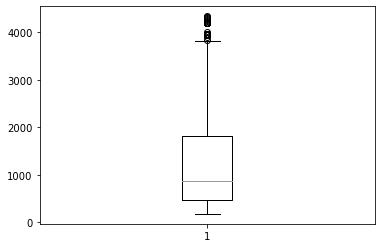

In [1792]:
#aon
plt.boxplot(telecom.aon)
plt.show()

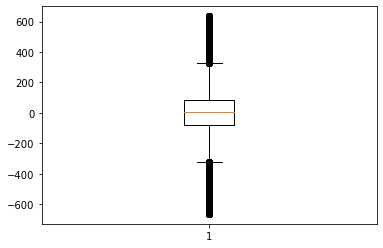

In [1793]:
#arpu_change_in_behaviour
plt.boxplot(telecom.arpu_change_in_behaviour)
plt.show()

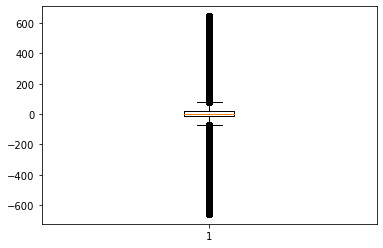

In [1794]:
#onnet_mou_change_in_behaviour
plt.boxplot(telecom.onnet_mou_change_in_behaviour)
plt.show()

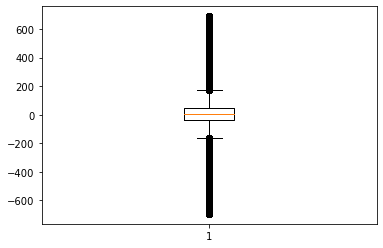

In [1795]:
#offnet_mou_change_in_behaviour
plt.boxplot(telecom.offnet_mou_change_in_behaviour)
plt.show()

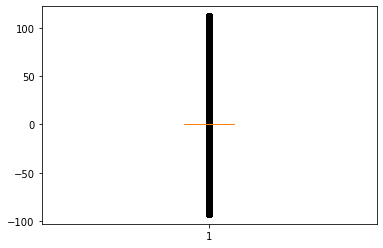

In [1796]:
#roam_ic_mou_change_in_behaviour
plt.boxplot(telecom.roam_ic_mou_change_in_behaviour)
plt.show()

#### Outlier analysis and treatment for telecom_EDA

In [1892]:
telecom_EDA_numeric=telecom_EDA.select_dtypes(include=['float64','int64'])
telecom_EDA_numeric.shape

(69999, 31)

In [1893]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom_EDA_numeric.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,aon,churn_probability,arpu_change_in_behaviour,onnet_mou_change_in_behaviour,offnet_mou_change_in_behaviour,roam_ic_mou_change_in_behaviour,roam_og_mou_change_in_behaviour,loc_og_t2c_mou_change_in_behaviour,loc_og_mou_change_in_behaviour,std_og_mou_change_in_behaviour,...,total_rech_amt_change_in_behaviour,max_rech_amt_change_in_behaviour,last_day_rch_amt_change_in_behaviour,vol_2g_mb_change_in_behaviour,vol_3g_mb_change_in_behaviour,monthly_2g_change_in_behaviour,sachet_2g_change_in_behaviour,monthly_3g_change_in_behaviour,sachet_3g_change_in_behaviour,VBC_change_in_behaviour
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,1220.639709,0.101887,1.801312,2.377728,4.151719,1.427963,2.290083,-0.150524,3.730221,0.551059,...,1.411720,-3.186931,-1.128895,1.379558,-9.933378,0.000414,-0.034358,-0.005186,-0.007093,-5.102312
std,952.426321,0.302502,231.859069,210.289801,234.195161,46.657040,57.866922,6.123714,141.472001,292.201490,...,291.951021,103.980855,101.242847,176.701964,391.591578,0.258128,1.221348,0.301385,0.538613,201.894552
min,180.000000,0.000000,-12808.617000,-6359.920000,-12604.240000,-2277.980000,-3057.150000,-213.230000,-4619.975000,-12715.480000,...,-14344.500000,-3949.000000,-3949.000000,-8062.295000,-13887.680000,-3.500000,-27.000000,-7.000000,-36.000000,-8475.370000
25%,468.000000,0.000000,-77.062000,-15.355000,-35.645000,0.000000,0.000000,0.000000,-24.070000,-8.510000,...,-104.500000,-30.000000,-23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,868.000000,0.000000,5.959500,0.850000,3.190000,0.000000,0.000000,0.000000,1.080000,0.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1813.000000,0.000000,85.807250,22.530000,47.650000,0.000000,0.000000,0.000000,30.642500,15.577500,...,111.000000,25.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,2792.000000,1.000000,198.825700,91.127000,140.450000,6.916000,13.457000,2.040000,88.952000,140.236000,...,255.000000,78.500000,80.000000,35.305000,22.721000,0.000000,0.500000,0.000000,0.000000,6.086000
95%,3108.000000,1.000000,306.890200,198.325500,250.581000,22.455500,38.536000,4.450000,155.068500,314.334500,...,393.000000,120.000000,120.000000,135.116000,255.828500,0.500000,1.000000,0.000000,0.000000,116.067500
99%,3651.000000,1.000000,634.772990,645.802200,689.767300,111.980200,153.181200,12.680200,415.123500,929.059000,...,803.500000,275.000000,250.000000,526.133600,996.870700,1.000000,3.500000,1.000000,1.000000,534.943100


In [1894]:
#Looking at outliers from 0.9 to 1.0
telecom_EDA_numeric.describe(percentiles=[0.01,.9,.91,.92,.93,.94,.95,.96,.97,.98,.99,1.0])

,aon,churn_probability,arpu_change_in_behaviour,onnet_mou_change_in_behaviour,offnet_mou_change_in_behaviour,roam_ic_mou_change_in_behaviour,roam_og_mou_change_in_behaviour,loc_og_t2c_mou_change_in_behaviour,loc_og_mou_change_in_behaviour,std_og_mou_change_in_behaviour,...,total_rech_amt_change_in_behaviour,max_rech_amt_change_in_behaviour,last_day_rch_amt_change_in_behaviour,vol_2g_mb_change_in_behaviour,vol_3g_mb_change_in_behaviour,monthly_2g_change_in_behaviour,sachet_2g_change_in_behaviour,monthly_3g_change_in_behaviour,sachet_3g_change_in_behaviour,VBC_change_in_behaviour
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,1220.639709,0.101887,1.801312,2.377728,4.151719,1.427963,2.290083,-0.150524,3.730221,0.551059,...,1.411720,-3.186931,-1.128895,1.379558,-9.933378,0.000414,-0.034358,-0.005186,-0.007093,-5.102312
std,952.426321,0.302502,231.859069,210.289801,234.195161,46.657040,57.866922,6.123714,141.472001,292.201490,...,291.951021,103.980855,101.242847,176.701964,391.591578,0.258128,1.221348,0.301385,0.538613,201.894552
min,180.000000,0.000000,-12808.617000,-6359.920000,-12604.240000,-2277.980000,-3057.150000,-213.230000,-4619.975000,-12715.480000,...,-14344.500000,-3949.000000,-3949.000000,-8062.295000,-13887.680000,-3.500000,-27.000000,-7.000000,-36.000000,-8475.370000
1%,188.000000,0.000000,-662.587780,-658.730400,-695.627700,-92.590400,-131.600600,-18.660500,-373.433400,-930.962500,...,-827.000000,-275.000000,-275.000000,-581.342900,-1246.947200,-1.000000,-4.500000,-1.000000,-1.000000,-671.227000
50%,868.000000,0.000000,5.959500,0.850000,3.190000,0.000000,0.000000,0.000000,1.080000,0.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,2792.000000,1.000000,198.825700,91.127000,140.450000,6.916000,13.457000,2.040000,88.952000,140.236000,...,255.000000,78.500000,80.000000,35.305000,22.721000,0.000000,0.500000,0.000000,0.000000,6.086000
91%,2861.180000,1.000000,214.408350,103.588600,154.865400,8.640900,16.520000,2.390000,98.096800,163.370400,...,275.000000,85.000000,85.000000,46.511800,50.330900,0.000000,0.500000,0.000000,0.000000,16.226800
92%,2924.000000,1.000000,231.008480,119.287400,171.207400,10.805800,20.230000,2.765000,108.138600,188.981800,...,298.000000,98.000000,97.500000,60.736600,85.586600,0.000000,0.500000,0.000000,0.000000,32.565800
93%,2992.000000,1.000000,251.219310,138.285600,191.226300,13.605700,24.842100,3.230000,120.271400,222.298300,...,323.000000,104.000000,106.000000,78.979900,135.238300,0.000000,0.500000,0.000000,0.000000,52.643500


After looking at the above values we can cap the values of the outliers at 99% values

In [1895]:
# Columns with outliers 
out99 = telecom_EDA_numeric.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
out99_cond = out99 > 100
out_cols = out99[out99_cond].index.values
print('Columns with outliers :\n', out_cols)

Columns with outliers :
 ['arpu_change_in_behaviour' 'onnet_mou_change_in_behaviour'
 'offnet_mou_change_in_behaviour' 'roam_ic_mou_change_in_behaviour'
 'roam_og_mou_change_in_behaviour' 'loc_og_t2c_mou_change_in_behaviour'
 'loc_og_mou_change_in_behaviour' 'std_og_mou_change_in_behaviour'
 'isd_og_mou_change_in_behaviour' 'spl_og_mou_change_in_behaviour'
 'og_others_change_in_behaviour' 'total_og_mou_change_in_behaviour'
 'loc_ic_mou_change_in_behaviour' 'std_ic_mou_change_in_behaviour'
 'total_ic_mou_change_in_behaviour' 'spl_ic_mou_change_in_behaviour'
 'isd_ic_mou_change_in_behaviour' 'ic_others_change_in_behaviour'
 'total_rech_num_change_in_behaviour' 'total_rech_amt_change_in_behaviour'
 'max_rech_amt_change_in_behaviour' 'last_day_rch_amt_change_in_behaviour'
 'vol_2g_mb_change_in_behaviour' 'vol_3g_mb_change_in_behaviour'
 'monthly_2g_change_in_behaviour' 'sachet_2g_change_in_behaviour'
 'monthly_3g_change_in_behaviour' 'sachet_3g_change_in_behaviour'
 'VBC_change_in_behaviou

In [1896]:
telecom.shape

(69999, 125)

In [1897]:
# Fixing the outliers to 99th percentile values
out_treat = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in out_cols : 
    out_threshold = telecom_EDA[col].quantile(0.99)
    condition = telecom_EDA[col] > out_threshold
    out_treat = out_treat.append({'Column' : col , 'Outlier Threshold' : out_threshold, 'Outliers replaced' : telecom_EDA.loc[condition,col].shape[0] }, ignore_index=True)
    telecom_EDA.loc[condition, col] = out_threshold
out_treat

,Column,Outlier Threshold,Outliers replaced
0,arpu_change_in_behaviour,634.77299,700
1,onnet_mou_change_in_behaviour,645.8022,700
2,offnet_mou_change_in_behaviour,689.7673,700
3,roam_ic_mou_change_in_behaviour,111.9802,700
4,roam_og_mou_change_in_behaviour,153.1812,700
5,loc_og_t2c_mou_change_in_behaviour,12.6802,700
6,loc_og_mou_change_in_behaviour,415.1235,700
7,std_og_mou_change_in_behaviour,929.059,700
8,isd_og_mou_change_in_behaviour,4.14,700
9,spl_og_mou_change_in_behaviour,29.8852,700


In [1898]:
# Fixing the outliers to 1th percentile values for negative values
out_treat = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in out_cols : 
    out_threshold = telecom_EDA[col].quantile(0.01)
    if out_threshold < 0:
        condition = (telecom_EDA[col] < out_threshold)
        out_treat = out_treat.append({'Column' : col , 'Outlier Threshold' : out_threshold, 'Outliers replaced' : telecom_EDA.loc[condition,col].shape[0] }, ignore_index=True)
        telecom_EDA.loc[condition, col] = out_threshold
out_treat

,Column,Outlier Threshold,Outliers replaced
0,arpu_change_in_behaviour,-662.58778,700
1,onnet_mou_change_in_behaviour,-658.7304,700
2,offnet_mou_change_in_behaviour,-695.6277,700
3,roam_ic_mou_change_in_behaviour,-92.5904,700
4,roam_og_mou_change_in_behaviour,-131.6006,700
5,loc_og_t2c_mou_change_in_behaviour,-18.6605,700
6,loc_og_mou_change_in_behaviour,-373.4334,700
7,std_og_mou_change_in_behaviour,-930.9625,700
8,isd_og_mou_change_in_behaviour,-2.6,699
9,spl_og_mou_change_in_behaviour,-41.8403,700


In [1900]:
telecom_EDA.describe(percentiles=[.01,.25,.5,.75,.90,.95,.99])

,aon,churn_probability,arpu_change_in_behaviour,onnet_mou_change_in_behaviour,offnet_mou_change_in_behaviour,roam_ic_mou_change_in_behaviour,roam_og_mou_change_in_behaviour,loc_og_t2c_mou_change_in_behaviour,loc_og_mou_change_in_behaviour,std_og_mou_change_in_behaviour,...,total_rech_amt_change_in_behaviour,max_rech_amt_change_in_behaviour,last_day_rch_amt_change_in_behaviour,vol_2g_mb_change_in_behaviour,vol_3g_mb_change_in_behaviour,monthly_2g_change_in_behaviour,sachet_2g_change_in_behaviour,monthly_3g_change_in_behaviour,sachet_3g_change_in_behaviour,VBC_change_in_behaviour
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,1220.639709,0.101887,2.623413,3.066155,4.480715,1.580073,2.456111,-0.111370,3.921941,1.485030,...,2.260347,-2.801419,-0.470485,2.349386,-7.611589,0.001236,-0.031600,-0.001921,0.002343,-4.251618
std,952.426321,0.302502,189.928521,147.211565,169.839392,20.016191,29.197878,3.587070,98.695526,218.835247,...,241.770887,76.945639,76.543532,114.592268,240.551714,0.238440,0.915387,0.227552,0.225839,125.625913
min,180.000000,0.000000,-662.587780,-658.730400,-695.627700,-92.590400,-131.600600,-18.660500,-373.433400,-930.962500,...,-827.000000,-275.000000,-275.000000,-581.342900,-1246.947200,-1.000000,-4.500000,-1.000000,-1.000000,-671.227000
1%,188.000000,0.000000,-662.584076,-658.730008,-695.610354,-92.590008,-131.595112,-18.660010,-373.430068,-930.960050,...,-827.000000,-275.000000,-275.000000,-581.325358,-1246.900944,-1.000000,-4.500000,-1.000000,-1.000000,-671.210340
25%,468.000000,0.000000,-77.062000,-15.355000,-35.645000,0.000000,0.000000,0.000000,-24.070000,-8.510000,...,-104.500000,-30.000000,-23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,868.000000,0.000000,5.959500,0.850000,3.190000,0.000000,0.000000,0.000000,1.080000,0.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1813.000000,0.000000,85.807250,22.530000,47.650000,0.000000,0.000000,0.000000,30.642500,15.577500,...,111.000000,25.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,2792.000000,1.000000,198.825700,91.127000,140.450000,6.916000,13.457000,2.040000,88.952000,140.236000,...,255.000000,78.500000,80.000000,35.305000,22.721000,0.000000,0.500000,0.000000,0.000000,6.086000
95%,3108.000000,1.000000,306.890200,198.325500,250.581000,22.455500,38.536000,4.450000,155.068500,314.334500,...,393.000000,120.000000,120.000000,135.116000,255.828500,0.500000,1.000000,0.000000,0.000000,116.067500


### DATA Visualisation(EDA)

In [1901]:
#Checking the churn rate
churn = (sum(telecom_EDA['churn_probability']==1))/len(telecom_EDA['churn_probability'].index)*100
churn

10.188716981671167

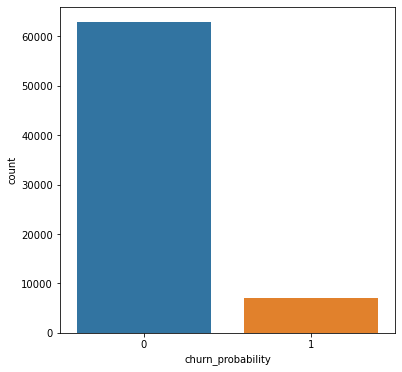

In [1902]:
#churn_probability
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(telecom_EDA.churn_probability)
plt.show()

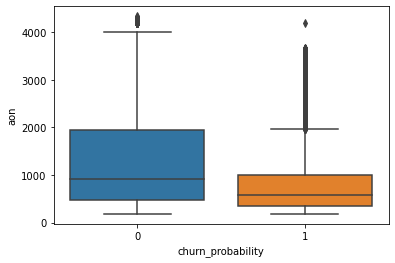

In [1903]:
#churn_probability
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(y=telecom_EDA.aon,x=telecom_EDA.churn_probability)
plt.show()

age on network for churned customers is less than non-churned customers.

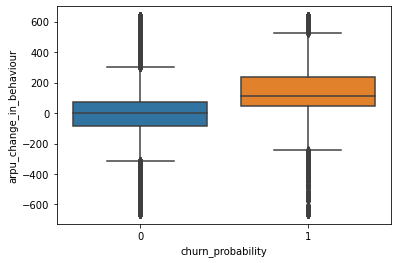

In [1904]:
#arpu_change_in_behaviour
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(y=telecom_EDA.arpu_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.show()

positive value of churned customers shows that arpu decreased in the month of august for churned customers.

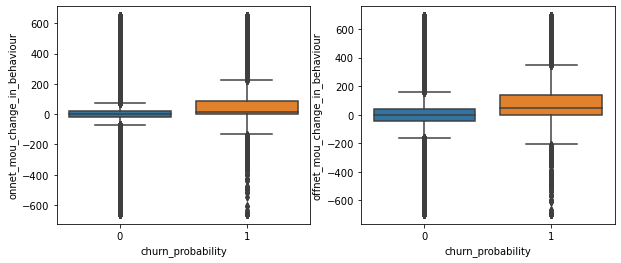

In [1905]:
#onnet_mou_change_in_behaviour and offnet_mou_change_in_behaviour
fig, ax = plt.subplots(figsize=(10,4))
plt.subplot(121)
sns.boxplot(y=telecom_EDA.onnet_mou_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.subplot(122)
sns.boxplot(y=telecom_EDA.offnet_mou_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.show()

All kind of calls within the same operator network and outside the same operator network reduced in the month of august for customers who churned.

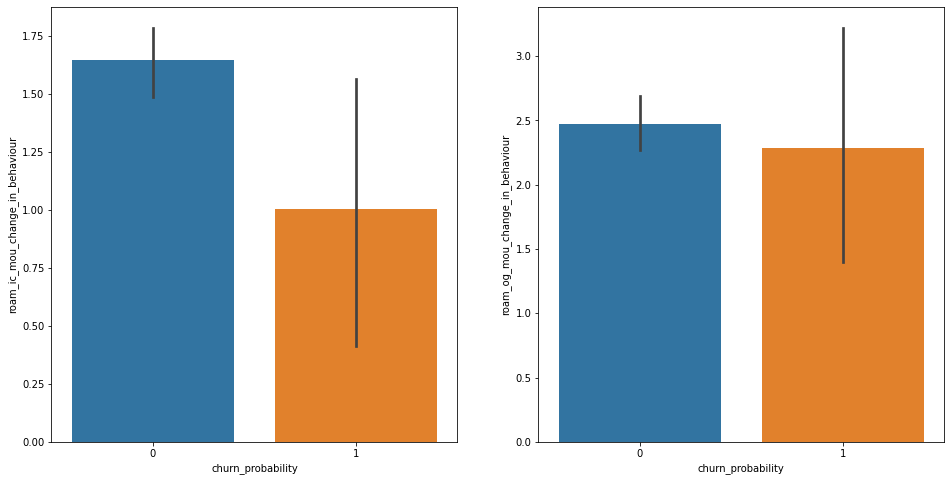

In [1906]:
#roam_ic_mou_change_in_behaviour and roam_og_mou_change_in_behaviour
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(121)
sns.barplot(y=telecom_EDA.roam_ic_mou_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.subplot(122)
sns.barplot(y=telecom_EDA.roam_og_mou_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.show()

Negative change in beahaviour for roam incoming and outgoing calls mou shows that churned customers moved to different location in the month of august before churning. The reason for churning can be change of location here.

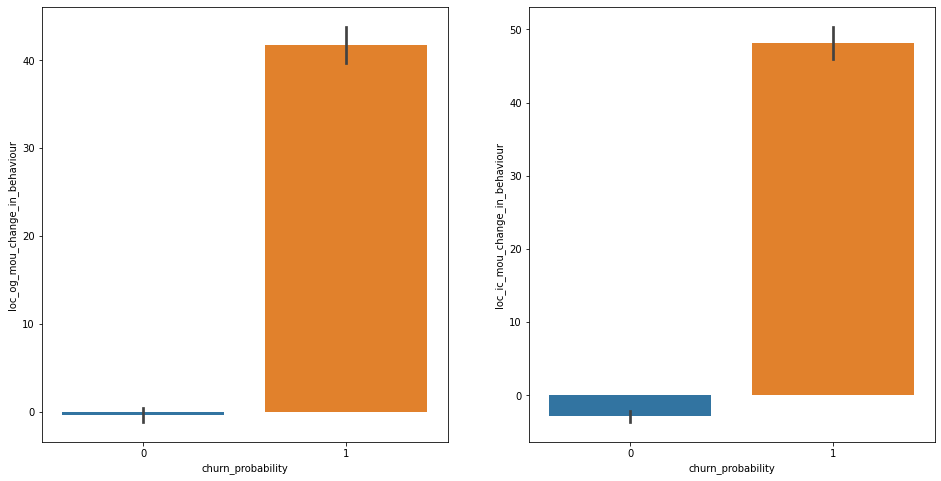

In [1907]:
#loc_og_mou_change_in_behaviour and loc_ic_mou_change_in_behaviour

fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(121)
sns.barplot(y=telecom_EDA.loc_og_mou_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.subplot(122)
sns.barplot(y=telecom_EDA.loc_ic_mou_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.show()

local incoming and outgoing calls mou decreasd in the month of august for customers who churned.

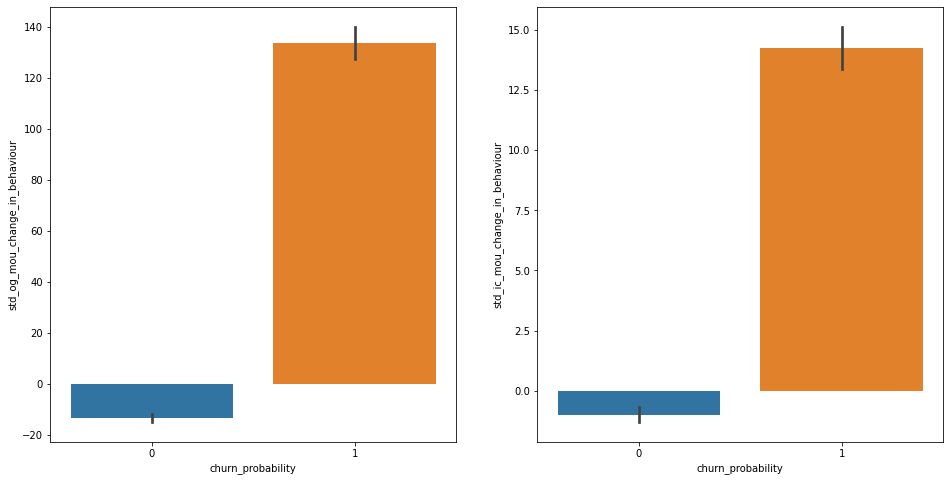

In [1908]:
#std_og_mou_change_in_behaviour and std_ic_mou_change_in_behaviour

fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(121)
sns.barplot(y=telecom_EDA.std_og_mou_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.subplot(122)
sns.barplot(y=telecom_EDA.std_ic_mou_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.show()

STD calls  outside the calling circle decreased in the month of august for churned customers.

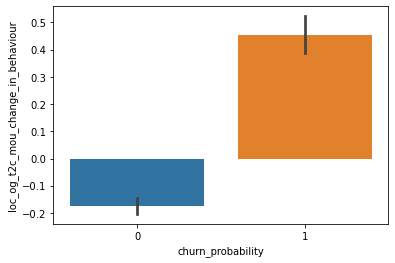

In [1909]:
#loc_og_t2c_mou_change_in_behaviour

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(y=telecom_EDA.loc_og_t2c_mou_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.show()

customer to call center mou increased in the month of august for customers whoc churned. This shows that customer might be facing issues and contacted to call center frequently. Not getting the issue resolved can be the reason for churn.

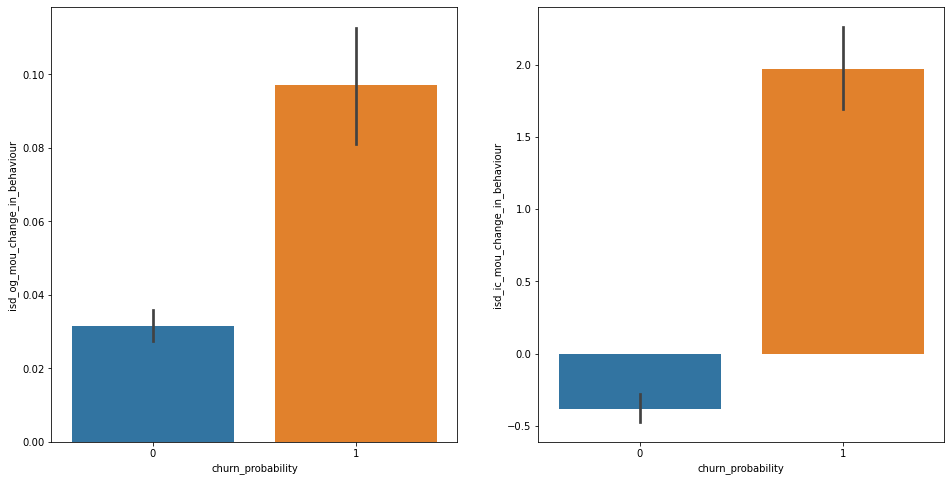

In [1910]:
#isd_og_mou_change_in_behaviour and isd_ic_mou_change_in_behaviour

fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(121)
sns.barplot(y=telecom_EDA.isd_og_mou_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.subplot(122)
sns.barplot(y=telecom_EDA.isd_ic_mou_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.show()

ISD outgoing and incoming calls mou were decreased in the month of august for churned customers. One of the reason can be that either the ISD caller or the customer moved to same location.

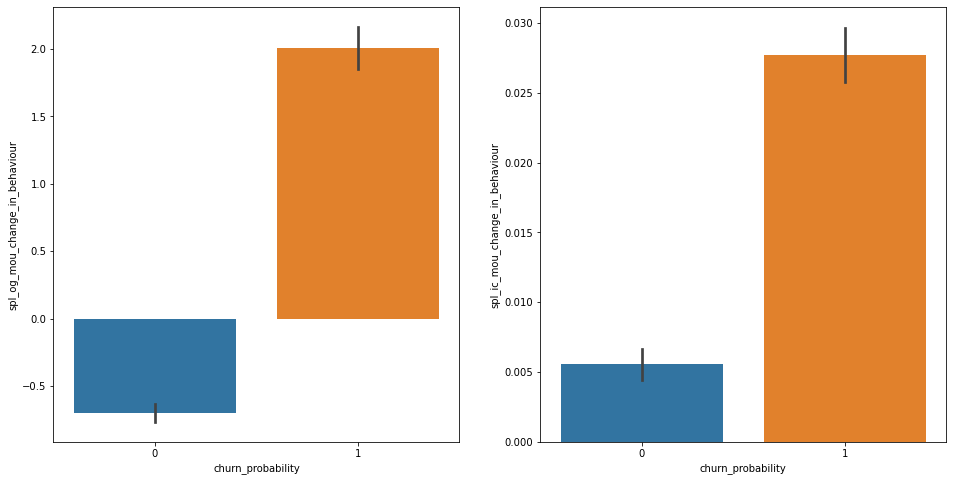

In [1911]:
#spl_og_mou_change_in_behaviour and spl_ic_mou_change_in_behaviour

fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(121)
sns.barplot(y=telecom_EDA.spl_og_mou_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.subplot(122)
sns.barplot(y=telecom_EDA.spl_ic_mou_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.show()

Special Calls outgoing and incoming decreased in the month of august for churned customers.

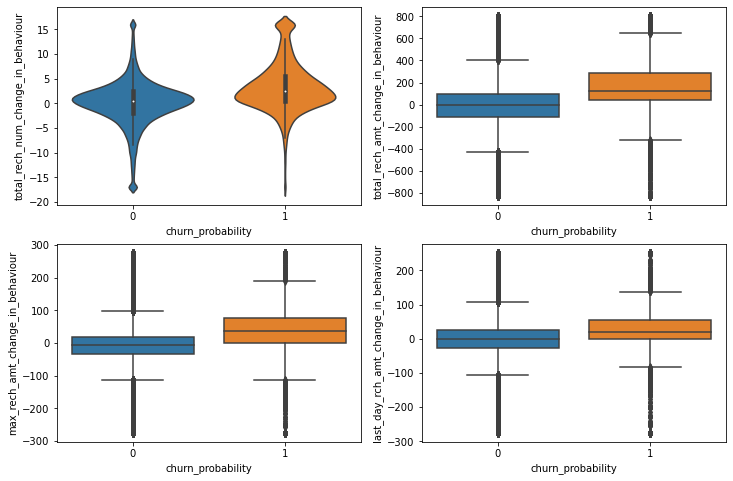

In [1912]:
#total_rech_num_change_in_behaviour, total_rech_amt_change_in_behaviour, max_rech_amt_change_in_behaviour
#and last_day_rch_amt_change_in_behaviour

fig, ax = plt.subplots(figsize=(12,8))
plt.subplot(221)
sns.violinplot(y=telecom_EDA.total_rech_num_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.subplot(222)
sns.boxplot(y=telecom_EDA.total_rech_amt_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.subplot(223)
sns.boxplot(y=telecom_EDA.max_rech_amt_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.subplot(224)
sns.boxplot(y=telecom_EDA.last_day_rch_amt_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.show()

- total number of recharge,total amount of recharge and max amount of recharge decreased in august for churned customers.
- last day of month of recharge was earlier in the month of august for churned customers

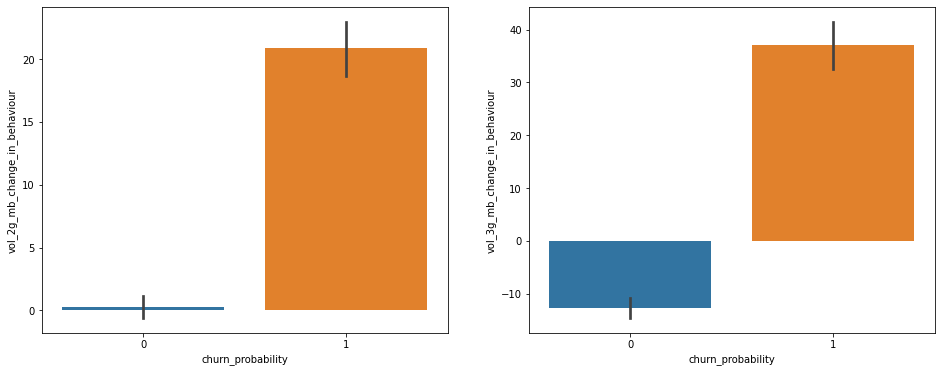

In [1913]:
#vol_2g_mb_change_in_behaviour and vol_3g_mb_change_in_behaviour

fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(121)
sns.barplot(y=telecom_EDA.vol_2g_mb_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.subplot(122)
sns.barplot(y=telecom_EDA.vol_3g_mb_change_in_behaviour,x=telecom_EDA.churn_probability)
plt.show()

volume of internet usage for 2G and 3G decreased in the month of august for churned cutomers. One of the reason can be that the customer was not getting adequate internet speed which resulted in churn.

<AxesSubplot:>

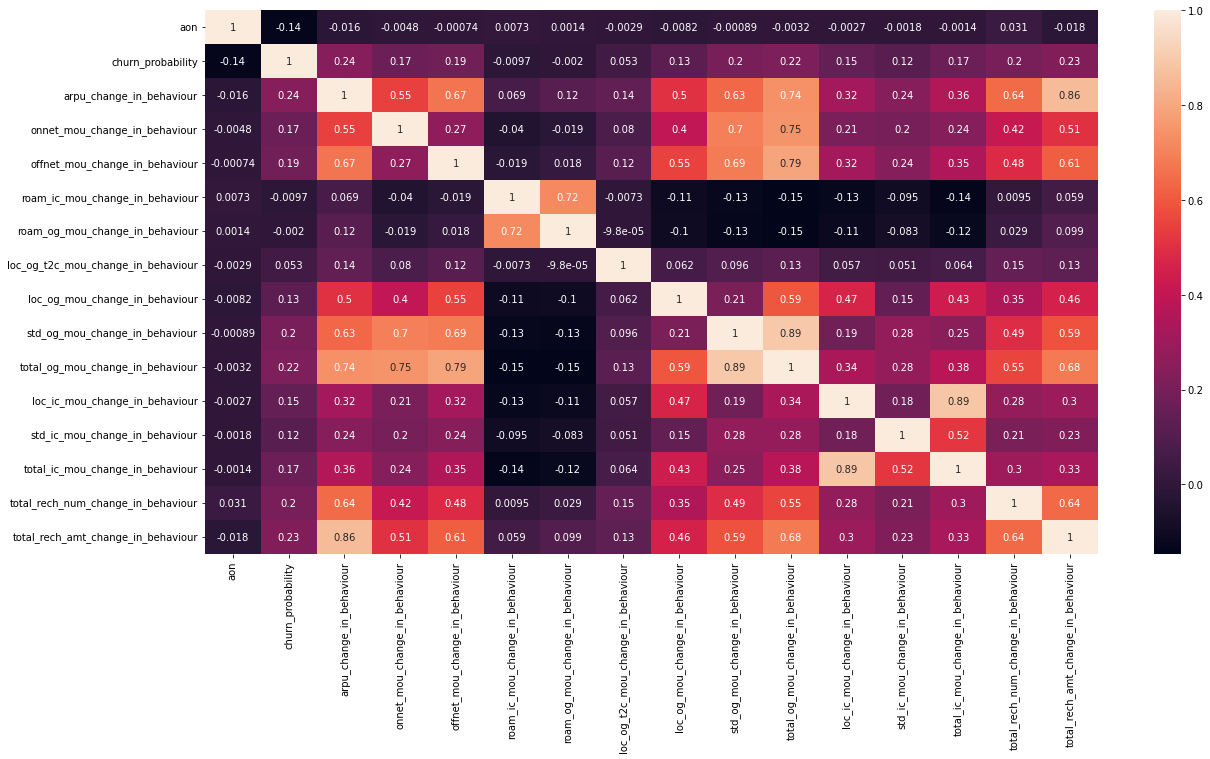

In [1915]:
corr=['aon', 'churn_probability', 'arpu_change_in_behaviour', 'onnet_mou_change_in_behaviour', 'offnet_mou_change_in_behaviour', 'roam_ic_mou_change_in_behaviour', 'roam_og_mou_change_in_behaviour','loc_og_t2c_mou_change_in_behaviour', 'loc_og_mou_change_in_behaviour','std_og_mou_change_in_behaviour', 'total_og_mou_change_in_behaviour','loc_ic_mou_change_in_behaviour','std_ic_mou_change_in_behaviour', 'total_ic_mou_change_in_behaviour', 'total_rech_num_change_in_behaviour', 'total_rech_amt_change_in_behaviour']
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom_EDA[corr].corr(),annot = True)

### Data Pre_Processing

#### train-test split

In [1981]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom.drop(['churn_probability'],axis=1)

# Putting response variable to y
y = telecom['churn_probability']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [1992]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [1994]:
y_train.shape

(48999,)

#### scaling

In [1983]:
from sklearn.preprocessing import StandardScaler

In [1984]:
scaler = StandardScaler()

In [1985]:
X_train.shape

(48999, 124)

In [1986]:
X_train = scaler.fit_transform(X_train)

In [1987]:
X_train.shape

(48999, 124)

In [1988]:
X_test = scaler.transform(X_test)

#### PCA

In [1989]:
X_train.shape

(48999, 124)

In [1703]:
from sklearn.decomposition import PCA

In [1704]:
pca = PCA()

In [1705]:
pca.fit_transform(X_train)

array([[-3.95149862e+00,  6.99932988e-01, -8.41257799e-02, ...,
        -2.16654282e-03, -1.47327186e-16,  3.96160526e-17],
       [-2.77301125e-01, -1.11552665e+00, -2.86384303e+00, ...,
        -2.36265457e-03, -2.58220954e-16,  1.80083518e-16],
       [ 8.15764249e+00, -1.35821218e+00,  4.77913905e-01, ...,
         2.66610969e-03,  3.08935597e-16, -6.31873474e-16],
       ...,
       [-1.94652686e+00, -1.67567883e+00, -5.98962862e-01, ...,
        -3.64455049e-04, -3.75136230e-17,  6.92465869e-18],
       [-6.64477101e-01,  1.84248400e-02, -5.91549696e-01, ...,
        -1.69730515e-03,  1.25284966e-18, -3.82050794e-19],
       [ 1.27559860e+01, -4.38220462e+00, -5.84182775e+00, ...,
         1.35491965e-03,  2.74988032e-18,  2.33746583e-18]])

In [1706]:
pca.components_

array([[ 1.69874591e-01,  1.81767748e-01,  1.69845312e-01, ...,
        -2.52780042e-03,  2.19513424e-03, -4.45750362e-03],
       [-5.48235433e-02,  2.52810600e-02,  1.43179787e-01, ...,
        -2.78027160e-02, -2.01545269e-02, -2.75955509e-02],
       [ 1.03176445e-01,  7.99784700e-02,  2.69950839e-04, ...,
         2.53696491e-02,  8.53808237e-03,  2.14423388e-02],
       ...,
       [ 2.04339646e-03,  1.46582625e-04, -3.59878767e-03, ...,
        -3.75684624e-04,  7.79357701e-05,  1.70383349e-03],
       [-0.00000000e+00, -9.24972809e-18,  8.26139210e-17, ...,
        -5.49401097e-16,  6.43859490e-17,  6.44361647e-17],
       [-0.00000000e+00, -1.68726383e-19, -1.68910510e-16, ...,
        -7.67938497e-17, -2.92112366e-17, -3.92756900e-18]])

In [1707]:
pca.explained_variance_ratio_

array([1.20442042e-01, 6.95233908e-02, 6.48231882e-02, 4.18299575e-02,
       3.58388349e-02, 2.87780323e-02, 2.35112520e-02, 2.33342932e-02,
       2.06052122e-02, 1.98015029e-02, 1.96315231e-02, 1.80217902e-02,
       1.69596440e-02, 1.66352621e-02, 1.64225129e-02, 1.55647939e-02,
       1.51827598e-02, 1.44410390e-02, 1.34658240e-02, 1.26787688e-02,
       1.22805233e-02, 1.22057553e-02, 1.18201518e-02, 1.16703418e-02,
       1.12590167e-02, 1.08213599e-02, 1.03437915e-02, 1.00764761e-02,
       9.91839157e-03, 9.71406358e-03, 9.37830223e-03, 8.99711722e-03,
       8.90962039e-03, 8.53744962e-03, 8.31778344e-03, 8.23226999e-03,
       7.97519091e-03, 7.90899401e-03, 7.47668915e-03, 7.34821555e-03,
       7.05563193e-03, 6.97788964e-03, 6.82711652e-03, 6.75543618e-03,
       6.55248132e-03, 6.52594953e-03, 6.28010059e-03, 6.10929765e-03,
       5.84793982e-03, 5.78062409e-03, 5.58734060e-03, 5.20855493e-03,
       5.00920900e-03, 4.75130746e-03, 4.60492127e-03, 4.47420040e-03,
      

In [1708]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

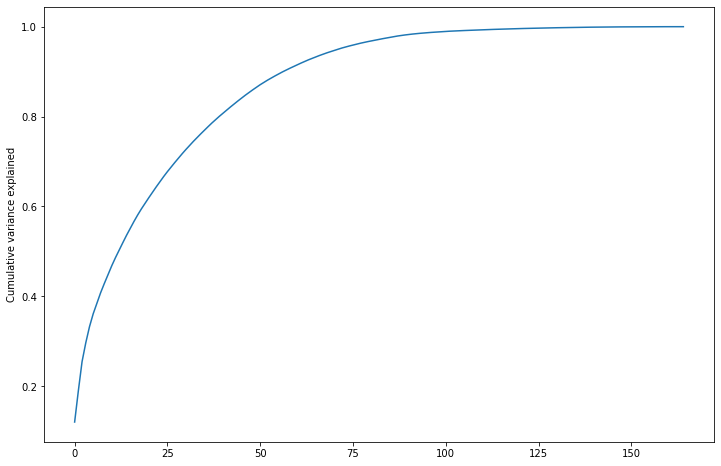

In [1709]:
fig = plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [1710]:
from sklearn.decomposition import PCA

In [1711]:
pca_final = PCA(0.95)

In [1712]:
df_train_pca = pca_final.fit_transform(X_train)

In [1713]:
df_train_pca.shape

(48999, 73)

In [1714]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(21000, 73)

In [1715]:
# observe class imbalance
y_train.value_counts()/y_train.shape

0    0.897284
1    0.102716
Name: churn_probability, dtype: float64

### Model Building and Evaluation

#### Logistic Regression with PCA

In [1513]:
from sklearn.linear_model import LogisticRegression

In [1514]:
learner_pca = LogisticRegression(class_weight = {0:0.1, 1: 0.9})

In [1515]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [1516]:
#test
pred_probs_test = model_pca.predict_proba(df_test_pca)
y_pred_df_test=pd.DataFrame(pred_probs_test)
y_pred_1_test = y_pred_df_test.iloc[:,[1]]
y_pred_1_test

,1
0,0.918598
1,0.982375
2,0.816544
3,0.288905
4,0.680703
...,...
20995,0.416593
20996,0.146879
20997,0.141985
20998,0.010199


In [1517]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
3425,1
33067,1
52420,0
5220,0
33958,1


In [1518]:
# Putting CustID to index _test
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final_test = pd.concat([y_test_df,y_pred_1_test],axis=1)
# Renaming the column 
y_pred_final_test= y_pred_final_test.rename(columns={ 1 : 'Churn_Prob'})

# Let's see the head of y_pred_final
y_pred_final_test.head()

,churn_probability,CustID,Churn_Prob
0,1,3425,0.918598
1,1,33067,0.982375
2,0,52420,0.816544
3,0,5220,0.288905
4,1,33958,0.680703


In [1519]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final_test['predicted'] = y_pred_final_test.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final_test.head()

,churn_probability,CustID,Churn_Prob,predicted
0,1,3425,0.918598,1
1,1,33067,0.982375,1
2,0,52420,0.816544,1
3,0,5220,0.288905,0
4,1,33958,0.680703,1


In [1520]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final_test[i]= y_pred_final_test.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final_test.head()

,churn_probability,CustID,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,3425,0.918598,1,1,1,1,1,1,1,1,1,1,1
1,1,33067,0.982375,1,1,1,1,1,1,1,1,1,1,1
2,0,52420,0.816544,1,1,1,1,1,1,1,1,1,1,0
3,0,5220,0.288905,0,1,1,1,0,0,0,0,0,0,0
4,1,33958,0.680703,1,1,1,1,1,1,1,1,0,0,0


In [1521]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final_test.churn_probability, y_pred_final_test[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.099952  1.000000  0.000000
0.1   0.1  0.441238  0.969033  0.382625
0.2   0.2  0.563905  0.950929  0.520925
0.3   0.3  0.651476  0.928537  0.620708
0.4   0.4  0.727714  0.903764  0.708164
0.5   0.5  0.793952  0.868985  0.785620
0.6   0.6  0.848619  0.815626  0.852283
0.7   0.7  0.890619  0.742735  0.907042
0.8   0.8  0.914571  0.541687  0.955981
0.9   0.9  0.904619  0.154359  0.987937


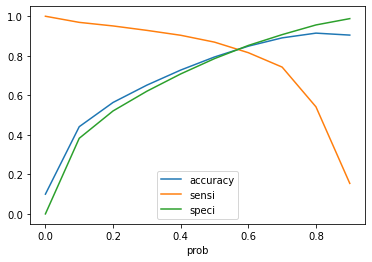

In [1522]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1523]:
#0.1
y_pred_final_test['final_predicted'] = y_pred_final_test.Churn_Prob.map( lambda x: 1 if x > 0.6 else 0)

y_pred_final_test.head()

,churn_probability,CustID,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,3425,0.918598,1,1,1,1,1,1,1,1,1,1,1,1
1,1,33067,0.982375,1,1,1,1,1,1,1,1,1,1,1,1
2,0,52420,0.816544,1,1,1,1,1,1,1,1,1,1,0,1
3,0,5220,0.288905,0,1,1,1,0,0,0,0,0,0,0,0
4,1,33958,0.680703,1,1,1,1,1,1,1,1,0,0,0,1


In [1524]:
from sklearn.metrics import precision_score,recall_score

In [1525]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final_test.churn_probability, y_pred_final_test.final_predicted)

0.8486190476190476

In [1526]:
precision_score(y_pred_final_test.churn_probability, y_pred_final_test.final_predicted)

0.38010657193605685

In [1527]:
recall_score(y_pred_final_test.churn_probability, y_pred_final_test.final_predicted)

0.8156264888041924

#### MODEL-1 Using Random Forest

In [1528]:
from sklearn.ensemble import RandomForestClassifier

In [1529]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight='balanced')

In [1530]:
params = {
    'max_depth': [5,10],
    'min_samples_leaf': [5,10],
    'n_estimators': [100,150]
}

In [1531]:
from sklearn.model_selection import GridSearchCV

In [1532]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [1533]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
CPU times: total: 59 s
Wall time: 5min 23s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [5, 10],
                         'n_estimators': [100, 150]},
             scoring='accuracy', verbose=1)

In [1534]:
grid_search.best_score_

0.9326312901844549

In [1535]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 150}

In [1536]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, n_estimators=150, n_jobs=-1,
                       random_state=42)

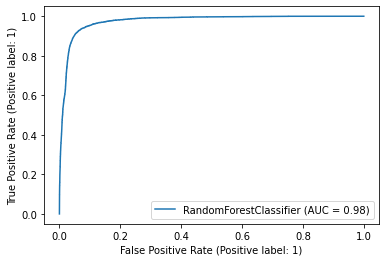

In [1537]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [1538]:
rf_best.feature_importances_

array([2.39435827e-03, 2.64205374e-03, 2.69262624e-02, 1.77921689e-03,
       1.69730015e-03, 1.70544338e-02, 2.53590950e-03, 2.11379723e-03,
       1.16098456e-02, 1.05717628e-03, 1.58818990e-03, 2.24421065e-02,
       8.00136167e-04, 1.77589441e-03, 1.93018558e-02, 1.62268223e-03,
       2.04663888e-03, 3.95977498e-02, 3.01281765e-03, 1.68889041e-03,
       3.14129929e-02, 1.09281988e-03, 6.96943436e-04, 3.15003288e-03,
       3.59073570e-04, 5.06116619e-04, 6.60913788e-04, 2.68683165e-03,
       2.40813007e-03, 5.91457123e-02, 1.05978317e-03, 1.42580311e-03,
       1.85488311e-03, 1.14897019e-03, 2.02050219e-03, 1.40918019e-03,
       1.63006476e-04, 2.97219565e-04, 1.31721297e-04, 1.48774667e-03,
       3.07279634e-03, 6.17161830e-03, 2.12520156e-04, 4.15929065e-04,
       5.25059502e-04, 5.98374889e-04, 1.41986282e-03, 3.90090884e-03,
       4.23796050e-04, 0.00000000e+00, 0.00000000e+00, 2.22571767e-03,
       5.87039606e-03, 5.29479165e-02, 2.39427487e-03, 2.33204760e-03,
      

In [1539]:
X_train=pd.DataFrame(X_train)

In [1540]:
telecom=telecom.drop('churn_probability',axis=1)

In [1541]:
X_train.columns=telecom.columns

In [1542]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [1543]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
65,loc_ic_mou_8,0.076900
80,total_ic_mou_8,0.074564
56,loc_ic_t2t_mou_8,0.059749
29,loc_og_mou_8,0.059146
59,loc_ic_t2m_mou_8,0.054542
...,...,...
109,monthly_2g_7,0.000101
118,sachet_3g_7,0.000083
114,monthly_3g_6,0.000079
49,og_others_7,0.000000


In [1544]:
y_train_pred=rf_best.predict(X_train)

In [1545]:
y_train_pred.shape

(48999,)

In [1546]:
y_train.shape

(48999,)

In [1547]:
metrics.accuracy_score(y_train, y_train_pred)

0.9499989795710116

In [1548]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.99      0.96      0.97     43966
           1       0.71      0.88      0.78      5033

    accuracy                           0.95     48999
   macro avg       0.85      0.92      0.88     48999
weighted avg       0.96      0.95      0.95     48999



In [1549]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train, y_train_pred) 
print(confusion)

[[42110  1856]
 [  594  4439]]


In [1550]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1551]:
# Let's see the sensitivity of our Random Forest model
TP / float(TP+FN)

0.881978939002583

In [1552]:
# Let us calculate specificity
TN / float(TN+FP)

0.9577855615703044

In [1553]:
y_test_pred=rf_best.predict(X_test)

In [1554]:
metrics.accuracy_score(y_test, y_test_pred)

0.9330952380952381

In [1555]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_test_pred) 
print(confusion)

[[18005   896]
 [  509  1590]]


In [1556]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1557]:
# Let's see the sensitivity of our Random Forest model
TP / float(TP+FN)

0.7575035731300619

In [1558]:
# Let us calculate specificity
TN / float(TN+FP)

0.9525951007883181

#### MODEL -2 Using Random Forest with PCA

In [948]:
from sklearn.ensemble import RandomForestClassifier

In [952]:
rf_best.fit(df_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, n_estimators=150, n_jobs=-1,
                       random_state=42)

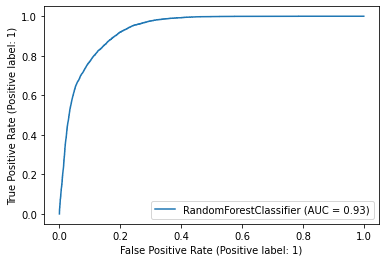

In [953]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_best, df_train_pca, y_train)
plt.show()

In [956]:
y_train_pred=rf_best.predict(df_train_pca)

In [957]:
y_train_pred.shape

(48999,)

In [958]:
y_train.shape

(48999,)

In [959]:
metrics.accuracy_score(y_train, y_train_pred)

0.8653645992775363

In [960]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.98      0.87      0.92     43966
           1       0.42      0.83      0.56      5033

    accuracy                           0.87     48999
   macro avg       0.70      0.85      0.74     48999
weighted avg       0.92      0.87      0.88     48999



In [961]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train, y_train_pred) 
print(confusion)

[[38228  5738]
 [  859  4174]]


In [962]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [963]:
# Let's see the sensitivity of our model
TP / float(TP+FN)

0.8293264454599643

In [964]:
# Let us calculate specificity
TN / float(TN+FP)

0.8694900605012964

In [966]:
y_test_pred=rf_best.predict(df_test_pca)

In [967]:
metrics.accuracy_score(y_test, y_test_pred)

0.8479047619047619

In [968]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_test_pred) 
print(confusion)

[[16329  2572]
 [  622  1477]]


In [969]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [970]:
# Let's see the sensitivity of our model
TP / float(TP+FN)

0.7036684135302526

In [971]:
# Let us calculate specificity
TN / float(TN+FP)

0.8639225437807524

####  MODEL -3 XGBOOST

In [1251]:
import xgboost as xgb

In [1252]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve

In [1253]:
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
scale_pos_weight

8.735545400357639

In [1254]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic',scale_pos_weight=scale_pos_weight)

In [1255]:
# Fit the model to our train and target
xgb_cfl=xgb_cfl.fit(X_train, y_train)  # default 

In [1256]:
# Get our predictions
xgb_predictions_train = xgb_cfl.predict(X_train)
xgb_predictions_test = xgb_cfl.predict(X_test)

In [1257]:
#train accuracy
metrics.accuracy_score(y_train,xgb_predictions_train)

0.9687748729565909

In [1258]:
# Confusion matrix 
confusion_train = metrics.confusion_matrix(y_train, xgb_predictions_train) 
print(confusion_train)

[[42450  1516]
 [   14  5019]]


In [1259]:
TP_train = confusion_train[1,1] # true positive 
TN_train = confusion_train[0,0] # true negatives
FP_train = confusion_train[0,1] # false positives
FN_train = confusion_train[1,0] # false negatives

In [1718]:
# Let's see the sensitivity of our model
TP_train / float(TP_train+FN_train)

0.9576793165110272

In [1261]:
#test accuracy
metrics.accuracy_score(y_test,xgb_predictions_test)

0.9302380952380952

In [1262]:
# Confusion matrix 
confusion_test = metrics.confusion_matrix(y_test, xgb_predictions_test) 
print(confusion_test)

[[17939   962]
 [  503  1596]]


In [1263]:
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [1264]:
# Let's see the sensitivity of our model
TP_test / float(TP_test+FN_test)

0.7603620771796094

####  MODEL - 4 XGBOOST with PCA

In [1955]:
import xgboost as xgb

In [1956]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve

In [1957]:
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
scale_pos_weight

8.735545400357639

In [1958]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic',scale_pos_weight=scale_pos_weight)

In [1307]:
# Fit the model to our train and target
xgb_cfl=xgb_cfl.fit(df_train_pca, y_train)  # default 

In [1308]:
# Get our predictions
xgb_predictions_train = xgb_cfl.predict(df_train_pca)
xgb_predictions_test = xgb_cfl.predict(df_test_pca)

In [1309]:
#train accuracy
metrics.accuracy_score(y_train,xgb_predictions_train)

0.9515500316332987

In [1310]:
# Confusion matrix 
confusion_train = metrics.confusion_matrix(y_train, xgb_predictions_train) 
print(confusion_train)

[[41651  2315]
 [   59  4974]]


In [1311]:
TP_train = confusion_train[1,1] # true positive 
TN_train = confusion_train[0,0] # true negatives
FP_train = confusion_train[0,1] # false positives
FN_train = confusion_train[1,0] # false negatives

In [1312]:
# Let's see the sensitivity of our model
TP_train / float(TP_train+FN_train)

0.9882773693622094

In [1313]:
#test accuracy
metrics.accuracy_score(y_test,xgb_predictions_test)

0.8986666666666666

In [1314]:
# Confusion matrix 
confusion_test = metrics.confusion_matrix(y_test, xgb_predictions_test) 
print(confusion_test)

[[17342  1559]
 [  569  1530]]


In [1315]:
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [1000]:
# Let's see the sensitivity of our model
TP_test / float(TP_test+FN_test)

0.6827060505002382

#### MODEL -5 HPT-XGBoosting

In [1959]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100,150], # no of trees 
        'learning_rate' : [0.05,0.08,0.1],  # eta
        'min_child_weight': [5,10],
        'gamma': [0.05,0.1],
        'subsample':  [0.5,0.8,1.0],
        'colsample_bytree': [ 0.5,0.8,1.0],
        'max_depth': [5,10,15]
        }

folds = 3

param_comb = 1

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=3, verbose=3, random_state=42)


In [1960]:
%%time
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
CPU times: total: 2min 32s
Wall time: 4min 52s


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [1961]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

 Best accuracy for 3-fold search with 1 parameter combinations:
0.9385293577419948

 Best hyperparameters:
{'subsample': 1.0, 'n_estimators': 150, 'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytre

In [1721]:
#making predictions
xgb_predictions_hpt_train = random_search.predict(X_train)
xgb_predictions_hpt_test = random_search.predict(X_test)


In [1722]:
metrics.accuracy_score(y_train, xgb_predictions_hpt_train)

0.9970611645135615

In [1723]:
metrics.accuracy_score(y_test, xgb_predictions_hpt_test)

0.9415714285714286

In [1724]:
# Confusion matrix 
confusion_train = metrics.confusion_matrix(y_train, xgb_predictions_hpt_train) 
print(confusion_train)
TP_train = confusion_train[1,1] # true positive 
TN_train = confusion_train[0,0] # true negatives
FP_train = confusion_train[0,1] # false positives
FN_train = confusion_train[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
sensitivity=TP_train / float(TP_train+FN_train)
print("sensitivity:",sensitivity)

[[43822   144]
 [    0  5033]]
sensitivity: 1.0


In [1725]:
# Confusion matrix 
confusion_test = metrics.confusion_matrix(y_test, xgb_predictions_hpt_test) 
print(confusion_test)
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
sensitivity=TP_test / float(TP_test+FN_test)
print("sensitivity:",sensitivity)

[[18299   602]
 [  625  1474]]
sensitivity: 0.7022391615054788


In [2005]:
#Calculate maximum features to be considered to build model
max_features = int(round(np.sqrt(X_train.shape[1])))    
print(max_features)

11


In [2007]:
XGB_best = random_search.best_estimator_
XGB_best

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [2009]:
X_train=pd.DataFrame(X_train)

In [2010]:
telecom=telecom.drop('churn_probability',axis=1)

In [2011]:
X_train.columns=telecom.columns

In [2012]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": XGB_best.feature_importances_
})

In [2014]:
pd.set_option('display.max_rows',200)
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
65,loc_ic_mou_8,0.186971
80,total_ic_mou_8,0.083748
14,roam_og_mou_8,0.038190
59,loc_ic_t2m_mou_8,0.037264
101,last_day_rch_amt_8,0.037066
83,spl_ic_mou_8,0.020483
11,roam_ic_mou_8,0.017184
104,vol_2g_mb_8,0.011799
118,sachet_3g_7,0.010106
40,std_og_mou_7,0.009937


#### evaluation on test.csv

In [1927]:
telecom_test=pd.read_csv('test.csv')

In [1928]:
telecom_test.shape

(30000, 171)

In [1929]:
# Let's see the type of each column
telecom_test.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    circle_id                 30000 non-null  int64  
 2    loc_og_t2o_mou            29684 non-null  float64
 3    std_og_t2o_mou            29684 non-null  float64
 4    loc_ic_t2o_mou            29684 non-null  float64
 5    last_date_of_month_6      30000 non-null  object 
 6    last_date_of_month_7      29798 non-null  object 
 7    last_date_of_month_8      29633 non-null  object 
 8    arpu_6                    30000 non-null  float64
 9    arpu_7                    30000 non-null  float64
 10   arpu_8                    30000 non-null  float64
 11   onnet_mou_6               28831 non-null  float64
 12   onnet_mou_7               28828 non-null  float64
 13   onnet_mou_8               28325 non-null  fl

In [1930]:
# Lets check number of null values
null_cols = telecom_test.isnull().sum()
print(null_cols[null_cols>0])

loc_og_t2o_mou            316
std_og_t2o_mou            316
loc_ic_t2o_mou            316
last_date_of_month_7      202
last_date_of_month_8      367
                        ...  
night_pck_user_7        22294
night_pck_user_8        22078
fb_user_6               22415
fb_user_7               22294
fb_user_8               22078
Length: 125, dtype: int64


In [1931]:
# Let check percentage of missing values
null_cols = telecom_test.isna().sum()
cols_with_missing = null_cols[null_cols > 0].index.tolist()
missing_values_percent = (telecom_test[cols_with_missing].isna().mean() * 100).round(2)
print(missing_values_percent)

loc_og_t2o_mou           1.05
std_og_t2o_mou           1.05
loc_ic_t2o_mou           1.05
last_date_of_month_7     0.67
last_date_of_month_8     1.22
                        ...  
night_pck_user_7        74.31
night_pck_user_8        73.59
fb_user_6               74.72
fb_user_7               74.31
fb_user_8               73.59
Length: 125, dtype: float64


#### Data Preparation

In [1932]:
# Let's check columns with missing values more than 50%
cols_to_drop = missing_values_percent[missing_values_percent > 50]
cols_to_drop

date_of_last_rech_data_6    74.72
date_of_last_rech_data_7    74.31
date_of_last_rech_data_8    73.59
total_rech_data_6           74.72
total_rech_data_7           74.31
total_rech_data_8           73.59
max_rech_data_6             74.72
max_rech_data_7             74.31
max_rech_data_8             73.59
count_rech_2g_6             74.72
count_rech_2g_7             74.31
count_rech_2g_8             73.59
count_rech_3g_6             74.72
count_rech_3g_7             74.31
count_rech_3g_8             73.59
av_rech_amt_data_6          74.72
av_rech_amt_data_7          74.31
av_rech_amt_data_8          73.59
arpu_3g_6                   74.72
arpu_3g_7                   74.31
arpu_3g_8                   73.59
arpu_2g_6                   74.72
arpu_2g_7                   74.31
arpu_2g_8                   73.59
night_pck_user_6            74.72
night_pck_user_7            74.31
night_pck_user_8            73.59
fb_user_6                   74.72
fb_user_7                   74.31
fb_user_8     

In [1933]:
# Let's remove these columns since imputing them will result in bias
# select columns with missing values greater than 50%
cols_to_drop = missing_values_percent[missing_values_percent > 50].index

# drop the columns
telecom_test = telecom_test.drop(cols_to_drop, axis=1)

In [1934]:
# Let's check shape now
telecom_test.shape

(30000, 141)

In [1935]:
# Let's check columns with missing values less than 10%
cols_to_drop = missing_values_percent[missing_values_percent < 10]
cols_to_drop

loc_og_t2o_mou          1.05
std_og_t2o_mou          1.05
loc_ic_t2o_mou          1.05
last_date_of_month_7    0.67
last_date_of_month_8    1.22
                        ... 
ic_others_7             3.91
ic_others_8             5.58
date_of_last_rech_6     1.69
date_of_last_rech_7     1.78
date_of_last_rech_8     3.87
Length: 95, dtype: float64

In [1936]:
# Impute columns with 0 if the percentage of missing values is less than 10%

cols_to_impute = missing_values_percent[missing_values_percent < 10].index
telecom_test[cols_to_impute] = telecom_test[cols_to_impute].fillna(0)

In [1937]:
# Let's check shape now
telecom_test.shape

(30000, 141)

In [1938]:
# Lets check percentage of missing values again
null_cols = telecom_test.isna().sum()
cols_with_missing = null_cols[null_cols > 0].index.tolist()
missing_values_percent = (telecom_test[cols_with_missing].isna().mean() * 100).round(2)
print(missing_values_percent)

Series([], dtype: float64)


In [1939]:
#dropping column id and circle id since irrelevant
#dropping columns which have 0 variance
telecom_test=telecom_test.drop(['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)

In [1940]:
#removing date related columns
telecom_test_object=telecom_test.select_dtypes(include=['object'])
date_col=list(telecom_test_object.columns)

In [1941]:
telecom_test=telecom_test.drop(columns=date_col,axis=1)

In [1942]:
telecom_test.shape

(30000, 124)

#### Outlier analysis and treatment

In [1943]:
telecom_test_numeric=telecom_test.select_dtypes(include=['float64','int64'])
telecom_test_numeric.shape

(30000, 124)

In [1944]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom_test_numeric.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,282.644348,279.355021,279.845167,125.539490,127.946958,125.679297,188.117924,189.104353,185.668382,9.975940,...,0.076167,0.080567,0.085233,0.073467,0.077967,0.082200,1218.023200,68.314097,68.946576,59.891621
std,314.560212,323.205370,326.437029,286.076687,298.064169,294.988494,312.988297,329.261711,327.934516,98.026703,...,0.373591,0.396503,0.392140,0.557327,0.613596,0.611546,960.109844,263.460641,278.749349,246.098292
min,-185.043000,-2014.045000,-146.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000
25%,92.907500,87.504750,84.180500,5.410000,4.790000,4.047500,28.605000,26.580000,24.025000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,466.000000,0.000000,0.000000,0.000000
50%,198.227500,191.775000,191.690500,31.400000,29.410000,28.480000,89.280000,84.925000,83.485000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,853.000000,0.000000,0.000000,0.000000
75%,371.969250,365.250750,367.804750,111.517500,108.845000,108.040000,220.150000,216.930000,213.745000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1795.000000,0.000000,0.000000,0.000000
90%,620.260800,620.143300,625.653500,328.135000,332.953000,328.650000,453.975000,466.863000,464.801000,10.301000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2814.000000,160.110000,146.750000,116.964000
95%,821.174300,837.930800,842.554150,587.766000,601.692000,592.098000,695.838500,719.329500,701.671000,37.510000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3135.000000,467.705500,458.543000,400.499500
99%,1430.489780,1451.245030,1483.087270,1358.320700,1468.186100,1463.387700,1505.469400,1539.692700,1509.771300,213.386000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3651.000000,1262.979200,1316.993500,1181.646200


In [1945]:
#Looking at outliers from 0.9 to 1.0
telecom_test_numeric.describe(percentiles=[0.01,.9,.91,.92,.93,.94,.95,.96,.97,.98,.99,1.0])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,282.644348,279.355021,279.845167,125.539490,127.946958,125.679297,188.117924,189.104353,185.668382,9.975940,...,0.076167,0.080567,0.085233,0.073467,0.077967,0.082200,1218.023200,68.314097,68.946576,59.891621
std,314.560212,323.205370,326.437029,286.076687,298.064169,294.988494,312.988297,329.261711,327.934516,98.026703,...,0.373591,0.396503,0.392140,0.557327,0.613596,0.611546,960.109844,263.460641,278.749349,246.098292
min,-185.043000,-2014.045000,-146.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000
50%,198.227500,191.775000,191.690500,31.400000,29.410000,28.480000,89.280000,84.925000,83.485000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,853.000000,0.000000,0.000000,0.000000
90%,620.260800,620.143300,625.653500,328.135000,332.953000,328.650000,453.975000,466.863000,464.801000,10.301000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2814.000000,160.110000,146.750000,116.964000
91%,650.938770,651.764900,655.400320,365.561500,371.116300,363.330900,488.249000,495.080900,498.594400,13.361800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2880.000000,206.509000,192.947000,156.640700
92%,683.873920,686.389440,693.973000,402.219600,415.053600,409.161600,527.380000,533.462400,534.298400,17.210000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2952.000000,252.012400,249.951600,202.386000
93%,726.039080,727.445320,736.527630,453.953300,467.685600,458.364900,574.261000,582.214500,576.105500,21.930000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3026.000000,315.249100,307.581200,256.682100


After looking at the above values we can cap the values of the outliers at 99% values

In [1946]:
# Columns with outliers 
out99 = telecom_test_numeric.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
out99_cond = out99 > 100
out_cols = out99[out99_cond].index.values
print('Columns with outliers :\n', out_cols)

Columns with outliers :
 ['arpu_6' 'arpu_7' 'arpu_8' 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8'
 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8' 'roam_ic_mou_6'
 'roam_ic_mou_7' 'roam_ic_mou_8' 'roam_og_mou_6' 'roam_og_mou_7'
 'roam_og_mou_8' 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8'
 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8'
 'loc_og_t2f_mou_6' 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8'
 'loc_og_t2c_mou_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6'
 'loc_og_mou_7' 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7'
 'std_og_t2t_mou_8' 'std_og_t2m_mou_6' 'std_og_t2m_mou_7'
 'std_og_t2m_mou_8' 'std_og_t2f_mou_6' 'std_og_t2f_mou_7'
 'std_og_t2f_mou_8' 'std_og_mou_6' 'std_og_mou_7' 'std_og_mou_8'
 'isd_og_mou_6' 'isd_og_mou_7' 'isd_og_mou_8' 'spl_og_mou_6'
 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6' 'og_others_7' 'og_others_8'
 'total_og_mou_6' 'total_og_mou_7' 'total_og_mou_8' 'loc_ic_t2t_mou_6'
 'loc_ic_t2t_mou_7' 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6'
 '

In [1947]:
# Fixing the outliers to 99th percentile values
out_treat = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in out_cols : 
    out_threshold = telecom_test[col].quantile(0.99)
    condition = telecom_test[col] > out_threshold
    out_treat = out_treat.append({'Column' : col , 'Outlier Threshold' : out_threshold, 'Outliers replaced' : telecom_test.loc[condition,col].shape[0] }, ignore_index=True)
    telecom_test.loc[condition, col] = out_threshold
out_treat

,Column,Outlier Threshold,Outliers replaced
0,arpu_6,1430.48978,300
1,arpu_7,1451.24503,300
2,arpu_8,1483.08727,300
3,onnet_mou_6,1358.3207,300
4,onnet_mou_7,1468.1861,300
...,...,...,...
118,sachet_3g_7,2.0,195
119,sachet_3g_8,2.0,232
120,aug_vbc_3g,1262.9792,300
121,jul_vbc_3g,1316.9935,300


In [1948]:
# Fixing the outliers to 1th percentile values for negative values
out_treat = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in out_cols : 
    out_threshold = telecom_test[col].quantile(0.01)
    if out_threshold < 0:
        condition = (telecom_test[col] < out_threshold)
        out_treat = out_treat.append({'Column' : col , 'Outlier Threshold' : out_threshold, 'Outliers replaced' : telecom_test.loc[condition,col].shape[0] }, ignore_index=True)
        telecom_test.loc[condition, col] = out_threshold
out_treat

,Column,Outlier Threshold,Outliers replaced


In [1949]:
telecom_test.describe(percentiles=[.01,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,276.598313,273.357527,273.800891,118.571324,121.081334,118.741430,180.901347,181.026370,177.660114,7.140200,...,0.069267,0.072100,0.077500,0.053900,0.053500,0.056167,1218.023200,61.349752,61.029219,53.034360
std,269.227488,274.677605,279.831073,230.402912,243.185540,240.396463,257.975717,264.866274,261.341875,29.116717,...,0.299452,0.308823,0.320568,0.272269,0.274785,0.286382,960.109844,204.231392,208.298890,185.181229
min,-185.043000,-2014.045000,-146.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000
25%,92.907500,87.504750,84.180500,5.410000,4.790000,4.047500,28.605000,26.580000,24.025000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,466.000000,0.000000,0.000000,0.000000
50%,198.227500,191.775000,191.690500,31.400000,29.410000,28.480000,89.280000,84.925000,83.485000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,853.000000,0.000000,0.000000,0.000000
75%,371.969250,365.250750,367.804750,111.517500,108.845000,108.040000,220.150000,216.930000,213.745000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1795.000000,0.000000,0.000000,0.000000
90%,620.260800,620.143300,625.653500,328.135000,332.953000,328.650000,453.975000,466.863000,464.801000,10.301000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2814.000000,160.110000,146.750000,116.964000
95%,821.174300,837.930800,842.554150,587.766000,601.692000,592.098000,695.838500,719.329500,701.671000,37.510000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3135.000000,467.705500,458.543000,400.499500


In [1950]:
# Putting feature variable to X
X = telecom_test
X

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,91.882,65.330,64.445,31.78,20.23,23.11,60.1600,32.16,34.83,0.00,...,0,0,0,0,0,0,1692,0.00,0.00,0.00
1,414.168,515.568,360.868,75.51,41.21,19.84,474.3400,621.84,394.94,0.00,...,0,0,0,0,0,0,2533,0.00,0.00,0.00
2,329.844,434.884,746.239,7.54,7.86,8.40,16.9800,45.81,45.04,22.81,...,0,0,0,0,0,0,277,525.61,758.41,241.84
3,43.550,171.390,24.400,5.31,2.16,0.00,40.0400,205.01,24.01,0.00,...,0,0,0,0,0,0,1244,0.00,0.00,0.00
4,306.854,406.289,413.329,450.93,609.03,700.68,60.9400,23.84,74.16,0.00,...,0,0,0,0,0,0,462,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,718.870,396.259,406.150,324.46,250.01,285.41,190.3600,166.14,221.96,87.76,...,0,0,0,0,0,0,1255,3.71,105.64,61.48
29996,218.327,324.070,374.981,263.79,467.24,650.26,108.5300,124.11,189.76,3.40,...,0,1,0,0,0,0,2258,0.00,0.00,0.00
29997,139.473,38.230,180.194,11.08,14.89,19.94,37.2400,16.74,45.28,0.00,...,0,0,0,0,0,0,440,0.00,0.00,0.00
29998,1122.912,781.121,257.439,122.74,50.23,26.46,1505.4694,1088.83,306.16,0.00,...,0,0,0,0,0,0,810,0.00,0.00,0.00


#### scaling

In [1951]:
X_test = scaler.transform(X)

#### PCA

In [1952]:
X_test.shape

(30000, 124)

In [ ]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

In [ ]:
solution=pd.read_csv('solution.csv')
solution.head()

In [ ]:
y=solution.churn_probability

#### Logistic Regression

In [1116]:
#test
pred_probs_test = model_pca.predict_proba(X_test_pca)
y_pred_df_test=pd.DataFrame(pred_probs_test)
y_pred_1_test = y_pred_df_test.iloc[:,[1]]
y_pred_1_test

,1
0,0.378610
1,0.361062
2,0.394471
3,0.598063
4,0.305492
...,...
29995,0.275862
29996,0.140708
29997,0.408753
29998,0.875947


In [1117]:
# Renaming the column 
y_pred_1_test= y_pred_1_test.rename(columns={ 1 : 'Churn_Prob'})

In [1118]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_1_test['predicted'] = y_pred_1_test.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_1_test.head()

,Churn_Prob,predicted
0,0.378610,0
1,0.361062,0
2,0.394471,0
3,0.598063,1
4,0.305492,0


In [1119]:
y_pred_1_test=y_pred_1_test.drop(columns='Churn_Prob',axis=1)

In [1120]:
# Renaming the column 
y_pred_1_test= y_pred_1_test.rename(columns={ 'predicted' : 'churn_probability'})

In [1122]:
y_pred_1_test.reset_index(inplace=True)

In [1123]:
y_pred_1_test.head()

,index,churn_probability
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0


In [1124]:
# Renaming the column 
y_pred_1_test= y_pred_1_test.rename(columns={ 'index' : 'id'})

In [1125]:
y_pred_1_test['id']=y_pred_1_test['id'].apply(lambda x:x+69999)

In [1128]:
y_pred_1_test.to_csv('log_reg_telecom_12.csv', index=False)

#### Random Forest

In [1630]:
y_pred_rf=rf_best.predict(X_test)

In [1631]:
y_pred_rf=pd.DataFrame(y_pred_rf)

In [1632]:
y_pred_rf.head()

,0
0,1
1,1
2,1
3,0
4,1


In [1595]:
y_pred_rf.reset_index(inplace=True)

In [1596]:
y_pred_rf.head()

,index,0
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1


In [1597]:
# Renaming the column 
y_pred_rf= y_pred_rf.rename(columns={ 0 : 'churn_probability','index':'id'})

In [1598]:
y_pred_rf.head()

,id,churn_probability
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1


In [1150]:
y_pred_rf['id']=y_pred_rf['id'].apply(lambda x:x+69999)

In [1151]:
y_pred_rf.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [1152]:
y_pred_rf.to_csv('RF_telecom.csv', index=False)

#### XGBoost

In [1293]:
xgb_pred_test = xgb_cfl.predict(X_test)

In [1294]:
xgb_pred_test=pd.DataFrame(xgb_pred_test)

In [1295]:
xgb_pred_test.head()

,0
0,0
1,0
2,1
3,0
4,0


In [1296]:
xgb_pred_test.reset_index(inplace=True)

In [1297]:
xgb_pred_test.head()

,index,0
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


In [1298]:
# Renaming the column 
xgb_pred_test= xgb_pred_test.rename(columns={ 0 : 'churn_probability','index':'id'})

In [1299]:
xgb_pred_test.head()

,id,churn_probability
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


In [1300]:
xgb_pred_test['id']=xgb_pred_test['id'].apply(lambda x:x+69999)

In [1301]:
xgb_pred_test.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [1302]:
xgb_pred_test.to_csv('xgb_telecom_update_final.csv', index=False)

#### HPT-XGBoost

In [1962]:
xgb_predictions_hpt_test = random_search.predict(X_test)

In [1963]:
xgb_predictions_hpt_test=pd.DataFrame(xgb_predictions_hpt_test)

In [1964]:
xgb_predictions_hpt_test.head()

,0
0,0
1,0
2,1
3,0
4,0


In [1965]:
xgb_predictions_hpt_test.reset_index(inplace=True)

In [1966]:
xgb_predictions_hpt_test.head()

,index,0
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


In [1967]:
# Renaming the column 
xgb_predictions_hpt_test= xgb_predictions_hpt_test.rename(columns={ 0 : 'churn_probability','index':'id'})

In [1968]:
xgb_predictions_hpt_test.head()

,id,churn_probability
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


In [1969]:
xgb_predictions_hpt_test['id']=xgb_predictions_hpt_test['id'].apply(lambda x:x+69999)

In [1970]:
xgb_predictions_hpt_test.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [1971]:
xgb_predictions_hpt_test.to_csv('xgb_hpt_telecom_1.csv', index=False)

### Choose Best Model

- Model 1 - Random Forest 
    - Train  Accuracy = 0.95, Train Sesitivity = 0.88
    - Test  Accuracy = 0.93, Sesitivity = 0.7

- Model 2 - Random Forest with  PCA 
    - Train  Accuracy = 0.86, Sesitivity = 0.83   
    - Test  Accuracy = 0.84, Sesitivity = 0.703

- Model 3 - XG BOOST CLASSIFIER
    - Train  Accuracy = 0.97, Sesitivity = 0.99      
    - Test  Accuracy = 0.93, Sesitivity= 0.76

- Model 4 - XG BOOST CLASSIFIER with PCA 
    - Train  Accuracy = 0.90, Sesitivity = 0.68    
    - Test  Accuracy = 0.89, Sesitivity = 0.68
   
- Model 5 - XG BOOST CLASSIFIER with HPT
    - Train  Accuracy = 0.99, Sesitivity = 0.1   
    - Test  Accuracy = 0.94, Sesitivity = 0.704 


Hence Choosing Model 5 - XG BOOST CLASSIFIER with HPT as our final model

### Choose important features

important features came out as best predictors are:
- loc_ic_mou_8
- total_ic_mou_8
- roam_og_mou_8
- loc_ic_t2m_mou_8
- last_day_rch_amt_8
- spl_ic_mou_8
- roam_ic_mou_8
- vol_2g_mb_8
- sachet_3g_7
- std_og_mou_7
- total_rech_amt_8

### Business Recommendations

- The prediction can be used to take steps towards retaining customer paying high values incase there   is any probability of them being churn.
- Maximum churn happens in first 6 months hence such customers should be focused.
- Customers with lower outgoing calls in 8th month are at higher risk of being churn. Hence such customers need to be given attention.
- Customers with low arpu(average revenue per user) should be focused as there is high possibility for   them being churn
- Company can give more discounts or some special offers or launch new schemes to retain customers at   risk of being churn.
- roaming usage incoming and outgoing seems to be important predictors of churn. Company can think of   lowering rates for roaming usage.
- local incoming calls within same operator is the most important predictor of being churn and company   can make this service free to compete with other competitors and retain customers.
- Special packages can be rolled out for local outgoing calls which do not affect minutes of usage.
- Company can also think on revised rated of STD and ISD calls or special packages can be rolled out.
  total recharge amount is also one of the good indicator of churn and company can provide discounts     on recharge.